In [4]:
from functions import *
import numpy as np



In [2]:
gen_negative_images()

In [3]:
X, Y, Joints, Hand_Info = read_img_data(10)

000_1001
000_1007
000_101
000_1013
000_1019
negative_images\0.jpg
negative_images\1.jpg
negative_images\10.jpg
negative_images\100.jpg
negative_images\1000.jpg


In [12]:
from sklearn.model_selection import train_test_split

def split(X, Y, N):
    #N = Number of images in total
    values = np.random.permutation(N)
    new_x = X[values]
    new_y = Y[values]
    
    x, X_test, y, Y_test =  train_test_split(new_x, new_y, test_size = .20, random_state = 42)
    X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size = .20, random_state = 42)
    
    return X_train, X_test,X_val, Y_val, Y_train, Y_test


In [15]:
X_train, X_test, X_val, Y_val, Y_train, Y_test = split(X, Y, 10)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6, 100, 100, 3)
(2, 100, 100, 3)
(6,)
(2,)


In [16]:
print(Y_val.shape)
print(X_val.shape)

(2,)
(2, 100, 100, 3)


In [22]:
X_train= np.rollaxis(X_train, 3, 1)  

In [23]:
X_train.shape

(6, 3, 100, 100)

In [24]:
X_train

array([[[[ 66.,  65.,  62., ..., 153., 152., 152.],
         [ 60.,  58.,  56., ..., 150., 149., 148.],
         [ 51.,  49.,  45., ..., 145., 144., 143.],
         ...,
         [194., 190., 185., ..., 124., 121., 119.],
         [195., 191., 186., ..., 133., 130., 127.],
         [196., 192., 187., ..., 140., 136., 133.]],

        [[ 72.,  69.,  65., ..., 123., 122., 121.],
         [ 66.,  63.,  59., ..., 120., 119., 118.],
         [ 55.,  52.,  48., ..., 116., 115., 114.],
         ...,
         [150., 146., 142., ...,  88.,  85.,  83.],
         [152., 148., 143., ...,  97.,  94.,  91.],
         [153., 149., 144., ..., 103., 100.,  97.]],

        [[ 81.,  79.,  75., ...,  95.,  94.,  93.],
         [ 75.,  72.,  68., ...,  92.,  91.,  90.],
         [ 64.,  60.,  56., ...,  87.,  87.,  86.],
         ...,
         [ 70.,  66.,  60., ...,  61.,  59.,  57.],
         [ 73.,  69.,  63., ...,  71.,  68.,  65.],
         [ 75.,  71.,  65., ...,  78.,  74.,  71.]]],


       [[[176.

In [25]:
import imageio
import numpy as np
from functions import *
from PIL import Image

from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2
% matplotlib inline

In [43]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def gen_negative_images():
    cifar10_dict = unpickle('cifar-10-batches-py/data_batch_1')
    cifar_imgs = cifar10_dict[b'data']
    cifar_imgs = cifar_imgs.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
    for i,img in enumerate(cifar_imgs):
        im = Image.fromarray(img)
        im.save('negative_images/'+str(i)+'.jpg')

In [99]:
# Read Some Images
X, Y, Joints, Hand_Info = read_img_data(10)

000_1001
000_1007
000_101
000_1013
000_1019
negative_images\0.jpg
negative_images\1.jpg
negative_images\10.jpg
negative_images\100.jpg
negative_images\1000.jpg


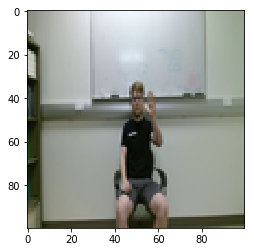

In [100]:
# Display an image
plt.imshow(X[1].astype(np.uint8))

In [101]:
# Print some Y's and J's. J = 0 means left hand, J = 1 means right hand.
# Y = 1 means hand is present in the image.
print(Y[:10])
print(Hand_Info[:10])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [102]:
labels = gen_labels(Y, Joints)

In [103]:
labels[1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        , 0.        ],
        [1.        , 0.55942292, 0.42934815, 0.12019259, 0.0556625 ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]])

In [104]:
np.argwhere(labels[1] == 1)

array([[1, 1, 0]], dtype=int64)

In [107]:
_, cx, cy, h, w = labels[1][1][1]
print(cx,cy, h, w)

0.5594229166666667 0.42934814814814815 0.12019259259259257 0.05566249999999995


In [108]:
ho = Hand_Info[1]
hand = ""
if ho == 0:
    hand += "Left Hand"

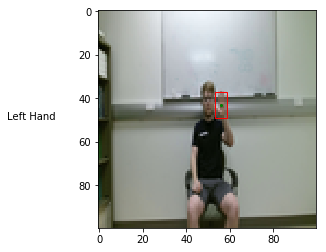

In [109]:
fig, ax = plt.subplots()
plt.imshow(X[1].astype(np.uint8))
plt.plot(cx*100, cy*100, color='g', marker='o', markersize='2')
r = plt.Rectangle(((cx- w/2.)*100, (cy-h/2.)*100), w*100, h*100, edgecolor='r', facecolor='none')
ax.add_artist(r)
plt.figtext(0.05, 0.5, hand)
plt.show()

Left Hand


In [38]:
import pylab as p

In [41]:
plt.figtext(0.05, 0.5, 'foo')
plt.show()